# Problem Statement

Use the time and date to create a predictive model to determine the number of cars in a given location 

# Import Libraries

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# Display up to 135 columns of a dataframe
pd.set_option('display.max_columns', 135)
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Default font size
plt.rcParams['font.size'] = 24
#Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import time
np.random.seed(42) # To make notebooks output identical at every run
import warnings
warnings.filterwarnings('ignore')

# Loading data and cleaning

In [2]:

import os  
os.chdir('/Users/tosinbosede/Desktop/Desktop_01_16_19') 
GTD = 'Dodgers_data.txt' 
data = pd.read_csv(GTD)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50399 entries, 0 to 50398
Data columns (total 2 columns):
4/10/2005 0:00    50399 non-null object
-1                50399 non-null int64
dtypes: int64(1), object(1)
memory usage: 787.6+ KB


### Looking at data properties

In [3]:
data.head(60)

,4/10/2005 0:00,-1
0,4/10/2005 0:05,-1
1,4/10/2005 0:10,-1
2,4/10/2005 0:15,-1
3,4/10/2005 0:20,-1
4,4/10/2005 0:25,-1
5,4/10/2005 0:30,-1
6,4/10/2005 0:35,-1
7,4/10/2005 0:40,-1
8,4/10/2005 0:45,-1
9,4/10/2005 0:50,-1


In [4]:
data.shape

(50399, 2)

### Renaming column '-1' as Count, as given in the metadata 

In [5]:
data = data.rename(columns={'-1':'Count'})
data.head()

,4/10/2005 0:00,Count
0,4/10/2005 0:05,-1
1,4/10/2005 0:10,-1
2,4/10/2005 0:15,-1
3,4/10/2005 0:20,-1
4,4/10/2005 0:25,-1


The data is supposed to have 3 columns and not 2. It appears the 1st and 2nd columns have been combined into one.
They need to be seperated.

### Splitting 1st column into Date and Time

In [6]:
time = data['4/10/2005 0:00'].str.split(expand=True).add_prefix('4/10/2005 0:00')
time.head()

,4/10/2005 0:000,4/10/2005 0:001
0,4/10/2005,0:05
1,4/10/2005,0:10
2,4/10/2005,0:15
3,4/10/2005,0:20
4,4/10/2005,0:25


In [7]:
#Renaming columns in time dataframe
time = time.rename(columns={'4/10/2005 0:000':'Date', '4/10/2005 0:001':'Time'})
time.head()

,Date,Time
0,4/10/2005,0:05
1,4/10/2005,0:10
2,4/10/2005,0:15
3,4/10/2005,0:20
4,4/10/2005,0:25


In [8]:
df = pd.concat([time, data], axis=1)
df = df.drop(['4/10/2005 0:00'], axis=1)
df.head()

,Date,Time,Count
0,4/10/2005,0:05,-1
1,4/10/2005,0:10,-1
2,4/10/2005,0:15,-1
3,4/10/2005,0:20,-1
4,4/10/2005,0:25,-1


### Converting 'Time' column into numerical attribute

In [9]:
Time=df['Time']
Time=pd.DataFrame(Time)
Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50399 entries, 0 to 50398
Data columns (total 1 columns):
Time    50399 non-null object
dtypes: object(1)
memory usage: 393.8+ KB


The 'Time' column in the df dataframe above is suposed numerical attribute with an inreament of 5 min for every observation, and not an object as indicated above. It has to be converted to a numerical 

In [10]:
E=[]
count=0
for i in df['Time']:
    count+=5
    E.append(count)
print('Done')
Time_new= pd.DataFrame(E)
Time_new.head(3)

Done


,0
0,5
1,10
2,15


In [11]:
Time_new.columns=['Time(min)']

In [12]:
df_new = pd.concat([df, Time_new], axis=1)
df_new.head(3)

,Date,Time,Count,Time(min)
0,4/10/2005,0:05,-1,5
1,4/10/2005,0:10,-1,10
2,4/10/2005,0:15,-1,15


In [13]:
df_new=df_new.drop(['Time'], axis=1)
df_new.head()

,Date,Count,Time(min)
0,4/10/2005,-1,5
1,4/10/2005,-1,10
2,4/10/2005,-1,15
3,4/10/2005,-1,20
4,4/10/2005,-1,25


In [14]:
df_new.tail()

,Date,Count,Time(min)
50394,10/1/2005,-1,251975
50395,10/1/2005,-1,251980
50396,10/1/2005,-1,251985
50397,10/1/2005,-1,251990
50398,10/1/2005,-1,251995


### Finding Missen values, or observations

In [15]:
df_new.isnull().values.any()

False

Data has no missing values 

# Exploratory Data Analysis

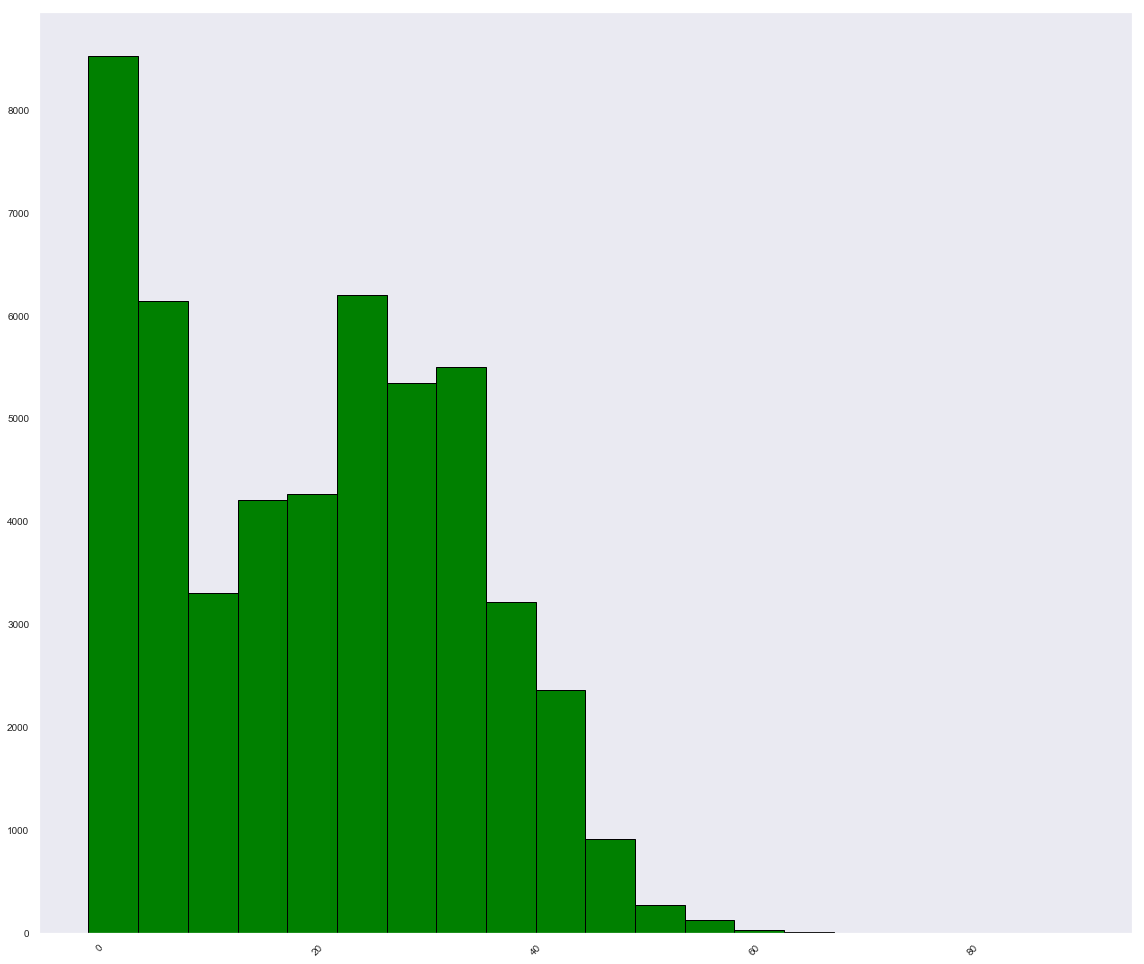

In [16]:
fig=df_new['Count'].hist(bins=20,
                 color='green',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(8,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 2, 1.5))

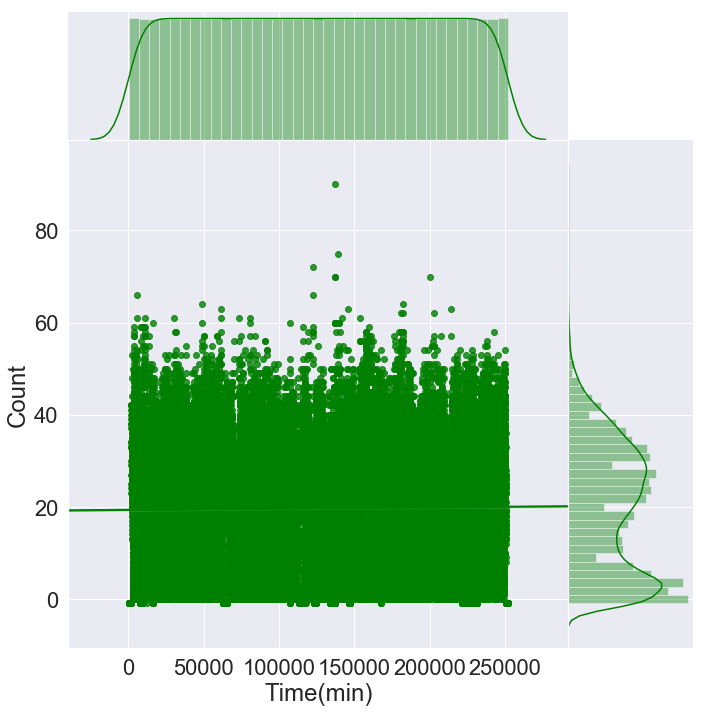

In [17]:
jp = sns.jointplot(data=df_new,
                   x='Time(min)', 
                   y='Count', color='green',
                   kind='reg', # <==Add regression and kernel density fits
                   space=0, height=10, ratio=4)

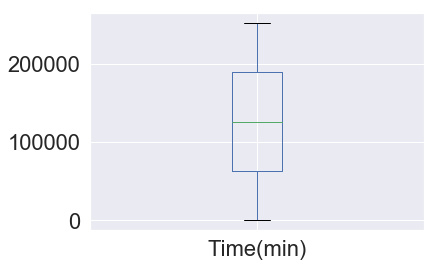

In [18]:
Time_boxplot= df_new.boxplot(column= ['Time(min)'])

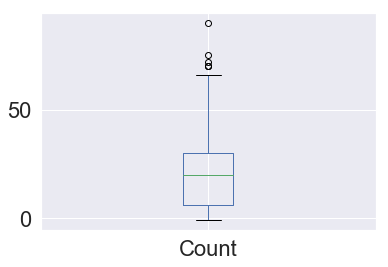

In [19]:
Count_boxplot= df_new.boxplot(column= ['Count'])

In [20]:
# Extract extract the label from datafram

Y = df_new['Count']
features = df_new.drop(['Count'], axis=1)

In [21]:
# Split the data set into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.30, shuffle=True, random_state=42)

In [22]:
# Onehot encoding the categorical variable
X_train_final = pd.get_dummies(X_train)
X_test_final = pd.get_dummies(X_test)


#Feature Scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.fit_transform(X_test_final)

#These must be converted to array 
y_train = np.array(y_train)
y_test = np.array(y_test)

# Model Training


### Linear Regression 

In [23]:
from sklearn.linear_model import LinearRegression
L_reg = LinearRegression()
L_reg.fit(X_train_scaled, y_train)
y_pred = L_reg.predict(X_train_scaled) 

#Compute performance metrics
import sklearn.metrics as sm

print('Linear Regressor Performance:')
print('Mean absolute error = ', round(sm.mean_absolute_error( y_train, y_pred), 2))
print('Mean squared error=', round(sm.mean_squared_error(y_train, y_pred), 2))
print('Root mean squared error=', round(np.sqrt(sm.mean_squared_error(y_train, y_pred)), 2))
print('Variance score=', round(sm.explained_variance_score(y_train, y_pred), 2))

Linear Regressor Performance:
Mean absolute error =  9.56
Mean squared error= 134.24
Root mean squared error= 11.59
Variance score= 0.29


#### Linear Regression Model cross validation

In [24]:
from sklearn.model_selection import cross_val_score

### Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
DT_reg = DecisionTreeRegressor()
DT_reg.fit(X_train_scaled, y_train)
y_pred = DT_reg.predict(X_train_scaled)

print('Linear Regressor Performance:')
print('Mean absolute error = ', round(sm.mean_absolute_error( y_train, y_pred), 2))
print('Mean squared error=', round(sm.mean_squared_error(y_train, y_pred), 2))
print('Root mean squared error=', round(np.sqrt(sm.mean_squared_error(y_train, y_pred)), 2))
print('Variance score=', round(sm.explained_variance_score(y_train, y_pred), 2))

Linear Regressor Performance:
Mean absolute error =  0.0
Mean squared error= 0.0
Root mean squared error= 0.0
Variance score= 1.0


### Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
FR_reg = RandomForestRegressor()
FR_reg.fit(X_train_scaled, y_train)
y_pred = FR_reg.predict(X_train_scaled)

print('Linear Regressor Performance:')
print('Mean absolute error = ', round(sm.mean_absolute_error( y_train, y_pred), 2))
print('Mean squared error=', round(sm.mean_squared_error(y_train, y_pred), 2))
print('Root mean squared error=', round(np.sqrt(sm.mean_squared_error(y_train, y_pred)), 2))
print('Variance score=', round(sm.explained_variance_score(y_train, y_pred), 2))

Linear Regressor Performance:
Mean absolute error =  1.66
Mean squared error= 6.26
Root mean squared error= 2.5
Variance score= 0.97


### Support Vector Machine Regressor

In [27]:
from sklearn.svm import SVR
SV_reg = SVR(kernel='rbf')
SV_reg.fit(X_train_scaled, y_train)
y_pred = SV_reg.predict(X_train_scaled)

print('Linear Regressor Performance:')
print('Mean absolute error = ', round(sm.mean_absolute_error( y_train, y_pred), 2))
print('Mean squared error=', round(sm.mean_squared_error(y_train, y_pred), 2))
print('Root mean squared error=', round(np.sqrt(sm.mean_squared_error(y_train, y_pred)), 2))
print('Variance score=', round(sm.explained_variance_score(y_train, y_pred), 2))

Linear Regressor Performance:
Mean absolute error =  10.63
Mean squared error= 169.83
Root mean squared error= 13.03
Variance score= 0.1


### K-Nearest Neighbors(KNN)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor()
KNN_reg.fit(X_train_scaled, y_train)
y_pred = KNN_reg.predict(X_train_scaled)

print('Linear Regressor Performance:')
print('Mean absolute error = ', round(sm.mean_absolute_error( y_train, y_pred), 2))
print('Mean squared error=', round(sm.mean_squared_error(y_train, y_pred), 2))
print('Root mean squared error=', round(np.sqrt(sm.mean_squared_error(y_train, y_pred)), 2))
print('Variance score=', round(sm.explained_variance_score(y_train, y_pred), 2))

Linear Regressor Performance:
Mean absolute error =  3.24
Mean squared error= 20.58
Root mean squared error= 4.54
Variance score= 0.89


# Model Evaluation 

### Evaluating the Performace of the Decision Tree Regressor by cross validation

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DT_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)
DT_rmse_scores=np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
    
display_scores(DT_rmse_scores)

Scores: [7.16518336 7.05943347 7.24815247 6.99777256 6.98124715 7.13584974
 7.21752638 6.81921555 7.02808587 7.05336297]
Mean: 7.0705829517918115
Standard deviation: 0.12042713514216134


### Evaluating the Performance of the Random Forest regressor by cross validation

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(FR_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)
FR_rmse_scores=np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(FR_rmse_scores)

Scores: [6.23647584 6.11322518 6.33616746 6.17341307 6.09730225 6.14060913
 6.20260442 5.90942069 6.07018521 6.20408259]
Mean: 6.148348584120687
Standard deviation: 0.10808139705682508


# Model Selection 

In [1]:
#models =[FR_reg, DT_reg]
#from sklearn.model_selection import cross_val_score
#cv=10

#cv_df = pd.DataFrame(index=range(cv * len(models)))

#entries = []
#for model in models:
#  model_name = model.__class__.__name__
#  accuracies = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=cv)
#  for fold_idx, accuracy in enumerate(accuracies):
#    entries.append((model_name, fold_idx, accuracy))
#cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

#fig, ax = plt.subplots(figsize=(20,15))

#sns.boxplot(x='model_name', y='accuracy', data=cv_df)
#sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#              size=10, jitter=True, edgecolor="gray", linewidth=3)
#plt.show()